# 逻辑回归

## sigmoid函数
$$
sigmoid(z)=\frac{1}{1+e^{-z}}
$$

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## 假设函数
$$
h(x)=\Theta_0+\Theta_1x_1+\Theta_2x_2
$$

In [4]:
def predict(theta,X):
    # 预测列表（将预测的值转换为只有0和1的列表，方便最终的绘图）
    h = sigmoid(X * theta.T)
    return [1 if x>=0.5 else 0 for x in h]

## 损失函数
利用计算公式带入
$$
J(\Theta)=\frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}(h_\Theta(x^{(i)})-y^{(i)})^2
$$
经过处理以后的损失函数
$$
J(\Theta)=-\frac{1}{m}[\sum_{i=1}^{m}y^{(i)}log h_\Theta(x^{(i)})+(1-y^{(i)})log(1-h_\Theta(x^{(i)}))]
$$
https://blog.csdn.net/code_caq/article/details/69803476

In [5]:
def costFunction(theta,X,y):
    # 将数据均转换为矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 带入公式求解
    part1 = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    part2 = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    return -1*np.sum(part1+part2)/len(X)

def costf(theta,*args):
    X_train,y_train = args
    m,n = X_train.shape
    J = 0
    theta = theta.reshape((n,1))
    h = sigmoid(np.dot(X_train,theta))
    J = -1 * np.sum(y_train * np.log(h) + (1 - y_train) * np.log((1 - h))) / m     
    return J

## 梯度下降函数
使用函数：
$$
\Theta_j = \Theta_j - \alpha\frac{\delta}{\delta\Theta_j}J(\Theta),(j=0,..,n)
$$
推导得到：
$$
\frac{\delta}{\delta\Theta_j}=-\frac{1}{m}\sum_{m=1}^{1}(h_\Theta(X^{(i)})-y^{(i)})x^{(i)}_j
$$
也就是
$$
\Theta_j = \Theta_j + \frac{\alpha}{m}\sum_{m=1}^{1}(h_\Theta(X^{(i)})-y^{(i)})x^{(i)}_j
$$


In [6]:
def gradientDescent(theta,X,y):
    # 转换数据为矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 参数数
    parameters = int(theta.ravel().shape[1])
    # 初始化梯度矩阵
    grad = np.zeros(parameters)
    # 损失值
    error = sigmoid(X* theta.T) - y
    
    for i in range(parameters):
        temp = np.multiply(error,X[:,i])
        grad[i] = np.sum(temp) / len(X)
    return grad

def gradf(theta,*args):
    X_train,y_train = args
    m,n = X_train.shape
    J = 0
    theta = theta.reshape((n,1))
    # 矩阵点乘
    h = sigmoid(np.dot(X_train,theta))
    # 初始化梯度值
    grad = np.zeros((X_train.shape[1],1))
    # 计算（矩阵运算，非循环运算）
    grad = X_train.T.dot((h-y_train)) / m
    g = grad.ravel()
    return g

## 主要方法
1. 导入数据
2. 初始化参数
3. 设置并带入迭代次数和学习率
4. 求$\Theta$

## 导入数据集

In [7]:
def loadDataSet():
    iris = load_iris()
    feathers = iris.data
    f = feathers[:,:2]
    labels = iris.target
    data = np.insert(f,len(f[0]),labels,axis=1)
    return data[np.where(data[:,-1]!=2)]

## 绘图

In [8]:
def plotData(data):
    class1 = data[np.where(data[:,-1]==0)]
    class2 = data[np.where(data[:,-1]==1)]
    fg,ax = plt.subplots(figsize=(12,8))
    ax.scatter(class1[:,0],class1[:,1],s=50,c='black',marker='x',label='class1')
    ax.scatter(class2[:,0],class2[:,1],s=50,c='green',marker='+',label='class2')
    ax.legend()
    ax.set_xlabel('Class 1')
    ax.set_ylabel('Class 2')
    plt.show()
    
def plotDescisionBoundary(data,theta,X):
    class1 = data[np.where(data[:,-1]==0)]
    class2 = data[np.where(data[:,-1]==1)]
    fg,ax = plt.subplots(figsize=(12,8))
    ax.scatter(class1[:,0],class1[:,1],s=50,c='black',marker='x',label='class1')
    ax.scatter(class2[:,0],class2[:,1],s=50,c='green',marker='+',label='class2')
    ax.legend()
    ax.set_xlabel('Class 1')
    ax.set_ylabel('Class 2')
    
    # 绘制直线：注意取值应该是对应的那个！！！
    min_X = min(X[:,1])
    max_X = max(X[:,1])
    x1 = np.arange(min_X,max_X,0.5)
    x2 = (-theta[0] - theta[1] * x1) / theta[2]
    x2 = np.array(x2.tolist())
    plt.plot(x1,x2,color="black")
    plt.legend(loc='upper left')
    plt.show()

## 梯度下降函数

In [9]:
def stocGradAscent(X,y):
    m,n = X.shape
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(X[i]*weights))
        error = y[i] - h
        weights = weights + alpha * error * X[i]
    return weights

def gradAscent(X,y):
    X = np.mat(X)
    y = np.mat(y).T
    
    m,n = np.shape(X)
    alpha = 0.001
    iterations = 1000
    weights = np.ones((n,1))
    for k in range(iterations):
        h = sigmoid(X*weights)
        error = (y-h)
        weights = weights + alpha * X.T*error
    return weights

## Main

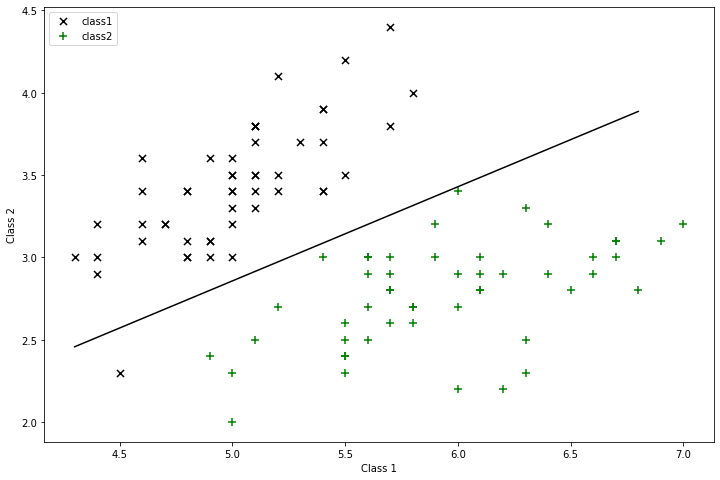

In [10]:
"""part1 可视化数据集"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import scipy.optimize as opt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
%matplotlib inline

data = loadDataSet()

# plotData(data)

"""part2 逻辑回归"""
cols = data.shape[1]
X = data[:,:cols-1]
y = data[:,-1]
X = np.insert(X,0,values=[1],axis=1)

# 初始化参数
theta = np.zeros(3)
"""part3 训练集预测验证"""
theta = gradAscent(X,y)

"""part4 决策边界"""
theta = theta.reshape(1,3).tolist()[0]
plotDescisionBoundary(data,theta,X)

## 10k交叉验证

In [11]:
def predict(X,theta):
    h = sigmoid(X * theta)
    return [1 if x >= 0.5 else 0 for x in h]

In [12]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np

"""part1 加载数据"""
# 创建分类器
KF = KFold(n_splits=10,shuffle=True,random_state=100)
accuracy_sum = 0
for itrain,itest in KF.split(X):
    # itrain--训练集索引；itest--测试集索引
    X_train = X[itrain]
    y_train = y[itrain]
    
    X_test = X[itest]
    y_test = y[itest]
    # 训练集训练参数
    theta = np.zeros(3)# 初始化参数
    theta = gradAscent(X_train,y_train)
    
    # 测试集用来检验参数
    # 获得经过参数整理后的预测值
    p = np.array(predict(X_test,theta))
    # 预测值与y进行对比
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(p, y_test)]
    accuracy = (sum(map(int, correct)) / len(correct))*100
    accuracy_sum += accuracy
print('accuracy = {0}%'.format(accuracy_sum/10.0))

accuracy = 99.0%
